<a href="https://colab.research.google.com/github/Miguel743/proyectosDatos/blob/main/PARTE_1_SeleccionVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install funpymodeling
!pip install pandas-profiling==2.7.1 
import pandas as pd
from google.colab.data_table import DataTable
from funpymodeling.exploratory import status, profiling_num, freq_tbl, cat_vars,num_vars 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/encuesta_clean_202102 - Hoja 1.csv', sep=',')
data02=data.copy()
data03=data02.drop(columns=['salario_mensual_o_retiro_neto_en_tu_moneda_local', 'unnamed27', 'salir_o_seguir_contestando','salir_o_seguir_contestando1','salir_o_seguir_contestando2','salir_o_seguir_contestando3'])


In [ ]:
# Tratamos los outliers a traves del metodo winzorise
from scipy.stats.mstats import winsorize
data04=data03.copy()
cols_to_stop=['salario_mensual_o_retiro_bruto_en_tu_moneda_local','anos_de_experiencia','anos_en_la_empresa_actual','anos_en_el_puesto_actual']
for col in cols_to_stop: 
     data04[col] = winsorize(data03[col], limits=[None, 0.05])

In [ ]:
var_cat_sel = ['tipo_de_contrato','trabajo_de','nivel_de_estudios_alcanzado', 'estado', 'carrera', 'universidad',
       'realizaste_cursos_de_especializacion','seniority','tiene_gente_a_cargo']

In [ ]:
# Generamos nuevo DF con las variables num y cat relacionadas con las preguntas que deseamos contestar y que han sido analizadas precedentemente. 
var_cat_num = ['salario_mensual_o_retiro_bruto_en_tu_moneda_local','anos_de_experiencia','anos_en_la_empresa_actual','anos_en_el_puesto_actual','tipo_de_contrato','trabajo_de','nivel_de_estudios_alcanzado','estado',
 'carrera','universidad','realizaste_cursos_de_especializacion','seniority', 'tiene_gente_a_cargo']
data05=data04.loc[:,var_cat_num]


In [ ]:
# Imputamos NaN
values = {'nivel_de_estudios_alcanzado':'nulo_nivel_de_estudio','estado':'nulo_estado',
 'carrera':'nulo_carrera','universidad':'nulo_universidad','realizaste_cursos_de_especializacion':'nulo_curso_de_especializacion','seniority':'nulo_seniority'}
data06 = data05.fillna(value=values)

In [ ]:
# Aplicación de principio de Paretto para el tratamiento de la alta cardinalidad en var categoricas

# variable 'trabajo_de'
trabajo_de = freq_tbl(data06['trabajo_de'])
trabajo_de.head(20)

,trabajo_de,frequency,percentage,cumulative_perc
0,Developer,2448,0.416610,0.416610
1,SysAdmin / DevOps / SRE,627,0.106705,0.523315
2,Technical Leader,353,0.060075,0.583390
3,QA / Tester,257,0.043737,0.627127
4,Manager / Director,246,0.041865,0.668993
5,Project Manager,191,0.032505,0.701498
6,BI Analyst / Data Analyst,158,0.026889,0.728387
7,HelpDesk,146,0.024847,0.753233
8,Architect,128,0.021784,0.775017
9,Consultant,104,0.017699,0.792716


In [ ]:
otralista= list(trabajo_de.iloc[0:11,0])
otralista

['Developer',
 'SysAdmin / DevOps / SRE',
 'Technical Leader',
 'QA / Tester',
 'Manager / Director',
 'Project Manager',
 'BI Analyst / Data Analyst',
 'HelpDesk',
 'Architect',
 'Consultant',
 'Business Analyst']

In [ ]:
data07 = data06.copy()

In [ ]:
# Asignamos la categoría 'other' a los casos donde 'cumulative_perc' sea mayor 0.80 
# Trabajamos sobre 'trabajo_de':
for i in range(len(data07)):
    if data07.loc[i,'trabajo_de'] in otralista:
      #print(i,'pude entrar')
      data07.loc[i,'trabajo_de_02']= data07.loc[i,'trabajo_de']
    else:
      data07.loc[i,'trabajo_de_02']= 'other'
      #print(i, 'NO')  

In [ ]:
# Trabajamos sobre 'carrera':
carrera = freq_tbl(data07['carrera'])
carrera.head(20)
otralista02= list(carrera.iloc[0:8,0])
for i in range(len(data07)):
    if data07.loc[i,'carrera'] in otralista02:
      #print(i,'pude entrar')
      data07.loc[i,'carrera_02']= data07.loc[i,'carrera']
    else:
      data07.loc[i,'carrera_02']= 'other'


In [ ]:
universidad = freq_tbl(data07['universidad'])
universidad.head(20)
otralista03= list(universidad.iloc[0:9,0])
# Trabajamos sobre 'universidad':
for i in range(len(data07)):
    if data07.loc[i,'universidad'] in otralista03:
      #print(i,'pude entrar')
      data07.loc[i,'universidad_02']= data07.loc[i,'universidad']
    else:
      data07.loc[i,'universidad_02']= 'other'

In [ ]:
# Eliminamos las variables categoricas previamente tratadas
data08= data07.drop(['trabajo_de','carrera','universidad'],axis=1)
status(data08)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,salario_mensual_o_retiro_bruto_en_tu_moneda_local,0,0.0,0,0.000000,1219,float64
1,anos_de_experiencia,0,0.0,525,0.089346,23,int64
2,anos_en_la_empresa_actual,0,0.0,2169,0.369129,16,int64
3,anos_en_el_puesto_actual,0,0.0,1784,0.303608,11,int64
4,tipo_de_contrato,0,0.0,0,0.000000,6,object
5,nivel_de_estudios_alcanzado,0,0.0,0,0.000000,8,object
6,estado,0,0.0,0,0.000000,4,object
7,realizaste_cursos_de_especializacion,0,0.0,0,0.000000,7,object
8,seniority,0,0.0,0,0.000000,4,object
9,tiene_gente_a_cargo,0,0.0,0,0.000000,2,object


In [ ]:
# Elimnamos duplicados
data09 = data08.drop_duplicates()
# Verificamos
data09[data09.duplicated()].shape

(0, 13)

SELLECCION DE MEJORES VARIABLES 
- Iniciaremos un proceso de selección de las "mejores variables" para nuestro modelos predictivos.
- Utilizaremos ANALISIS BIVARIADO para identificar los mejores variables preidctoras, tratando de identifica si dichas variables otorgan un orden a la variable obejetivo. 
-  Luego realizaremos un estudio de CORRELACION con dos objetivos: identificar variables de entrada fuertemente correlacionadas entre sí; y por otro lado confirmar las conclusiones obtenidas del punto anterior con respcto de la variable objetivo.

In [ ]:
# Crearemos una nueva variable llamada 'salario_bruto' de naturaleza categorica binaria. 
# El criterio será: si el salario bruto es mayor o igual al percentil 0.75 se le asigna el valor ALTO de lo contrario  el valor BAJO.
# Lo que buscamos es tener una variable a predecir binaria. 
data10 = data09.copy()

for label, row in data10.iterrows():
  if row['salario_mensual_o_retiro_bruto_en_tu_moneda_local'] >= 240000:
    data10.loc[label,'salario_bruto']= 'ALTO'
    #print('aca un ALTO')
  else: 
    data10.loc[label,'salario_bruto']= 'BAJO'
    #print('aca un bajo')


In [ ]:
data10.to_excel('/content/drive/MyDrive/data/data10.xlsx')
data10.to_csv('/content/drive/MyDrive/data/data10.csv')

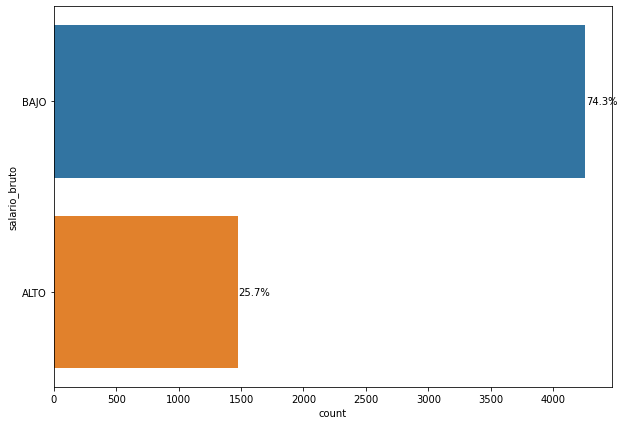

In [ ]:
plt.figure(figsize=(10,7))
tipo_cont_cnt = data10['salario_bruto'].value_counts().sort_values(ascending=False)
order = tipo_cont_cnt.index
sns.countplot(y=data10['salario_bruto'], order=order)
ndata04 = tipo_cont_cnt.values.sum()
for i, contador in enumerate(tipo_cont_cnt):
   pcnt = '{:0.1f}%'.format(100*contador/ndata04)
   plt.text(contador+5, i, pcnt, va ='center')
plt.show()

In [ ]:
# TIPO DE CONTRATO VS SALARIO BRUTO
contrato_vs_salario= pd.crosstab(data10['tipo_de_contrato'],data10['salario_bruto'], normalize='index', margins=True)
contrato_vs_salario

salario_bruto,ALTO,BAJO
tipo_de_contrato,,
Freelance,0.242424,0.757576
Full-Time,0.241959,0.758041
Part-Time,0.023166,0.976834
Participación societaria en una cooperativa,0.071429,0.928571
Remoto (empresa de otro país),0.800725,0.199275
Tercerizado (trabajo a través de consultora o agencia),0.198830,0.801170
All,0.257282,0.742718


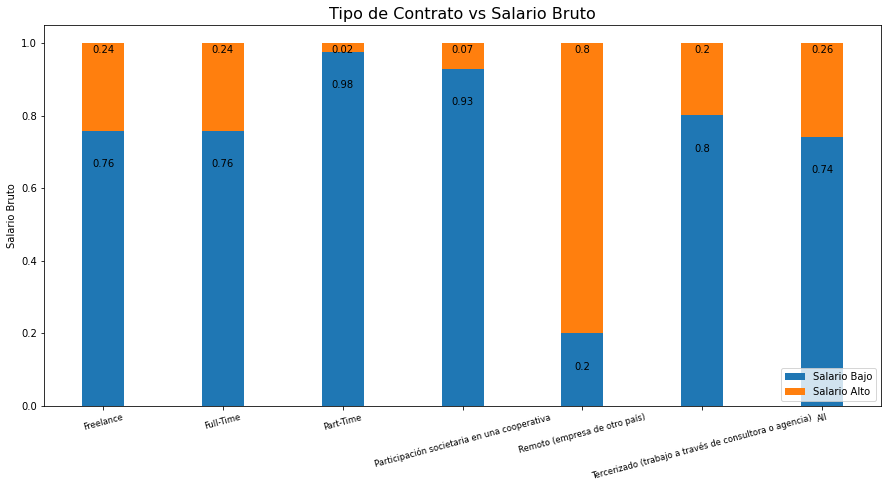

In [ ]:
#fig, ax= plt.subplots(figsize= (12,6))
#BarrasAlto= ax.bar(contrato_vs_salario.index, contrato_vs_salario.tipo_de_contrato, width= 0.7)
"""
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
"""
#width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize= (15,7))
plt.style.use('tableau-colorblind10')

barraBajo= ax.bar(contrato_vs_salario.index, contrato_vs_salario['BAJO'], width= 0.35, label='Salario Bajo')
barraAlto= ax.bar(contrato_vs_salario.index,contrato_vs_salario['ALTO'], width= 0.35, bottom=contrato_vs_salario['BAJO'], label='Salario Alto')

# Colocamos etiquetas en cada barra
for barra in barraBajo: 
  x= barra.get_x()
  y= barra.get_height()
  ancho= barra.get_width()
  plt.text(x+ancho/2, y-0.1, round(y,2), fontsize= 10, color= 'black', ha= 'center')
for barra in barraAlto: 
  xa= barra.get_x()
  ya= barra.get_height()
  anchoa= barra.get_width()
  plt.text(xa+anchoa/2, y+0.23, round(ya,2), fontsize= 10, color= 'black', ha= 'center')

ax.set_ylabel('Salario Bruto')
ax.set_title('Tipo de Contrato vs Salario Bruto', fontsize= 16)
plt.xticks(size='small',rotation=15)
ax.legend(loc= 'lower right')

plt.show()

In [ ]:
# NIVEL DE ESTUDIO ALCANZADO VS SALARIO BRUTO
nivelEstudio_vs_salario= pd.crosstab(data10['nivel_de_estudios_alcanzado'],data10['salario_bruto'], normalize='index', margins=True)
nivelEstudio_vs_salario

salario_bruto,ALTO,BAJO
nivel_de_estudios_alcanzado,,
Doctorado,0.350000,0.650000
Posdoctorado,0.500000,0.500000
Posgrado,0.412371,0.587629
Primario,0.000000,1.000000
Secundario,0.164894,0.835106
Terciario,0.162571,0.837429
Universitario,0.278104,0.721896
nulo_nivel_de_estudio,0.254631,0.745369
All,0.257282,0.742718


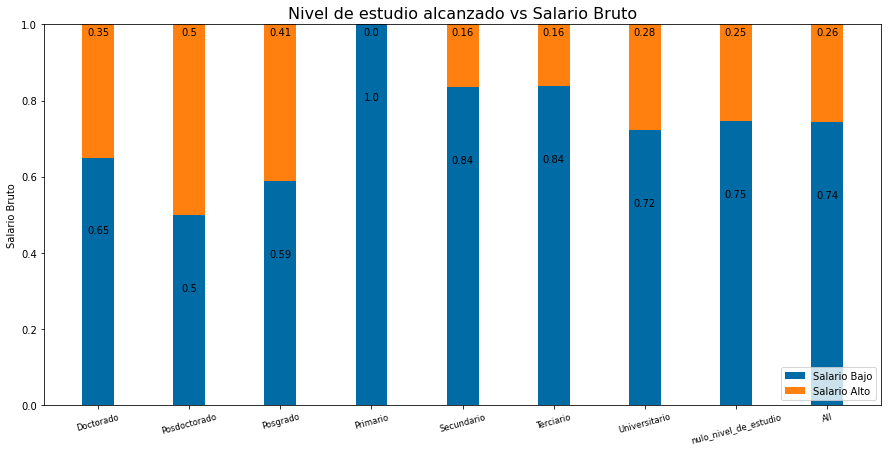

In [ ]:
fig, ax = plt.subplots(figsize= (15,7))
plt.style.use('tableau-colorblind10')

barraBajo= ax.bar(nivelEstudio_vs_salario.index, nivelEstudio_vs_salario['BAJO'], width= 0.35, label='Salario Bajo')
barraAlto= ax.bar(nivelEstudio_vs_salario.index, nivelEstudio_vs_salario['ALTO'], width= 0.35, bottom=nivelEstudio_vs_salario['BAJO'], label='Salario Alto')

# Colocamos etiquetas en cada barra

for barra in barraAlto: 
  xa= barra.get_x()
  ya= barra.get_height()
  anchoa= barra.get_width()
  plt.text(xa+anchoa/2, y+0.23, round(ya,2), fontsize= 10, color= 'black', ha= 'center')
for barra in barraBajo: 
  x= barra.get_x()
  y= barra.get_height()
  ancho= barra.get_width()
  plt.text(x+ancho/2, y-0.2, round(y,2), fontsize= 10, color= 'black', ha= 'center')

ax.set_ylabel('Salario Bruto')
ax.set_title('Nivel de estudio alcanzado vs Salario Bruto', fontsize= 16)
plt.xticks(size='small',rotation=15)
ax.legend(loc= 'lower right')

plt.show()

In [ ]:
# ESTADOO VS SALARIO BRUTO
estado_vs_salario= pd.crosstab(data10['estado'],data10['salario_bruto'], normalize='index', margins=True)
estado_vs_salario

salario_bruto,ALTO,BAJO
estado,,
Completado,0.293578,0.706422
En curso,0.172727,0.827273
Incompleto,0.321114,0.678886
nulo_estado,0.254631,0.745369
All,0.257282,0.742718


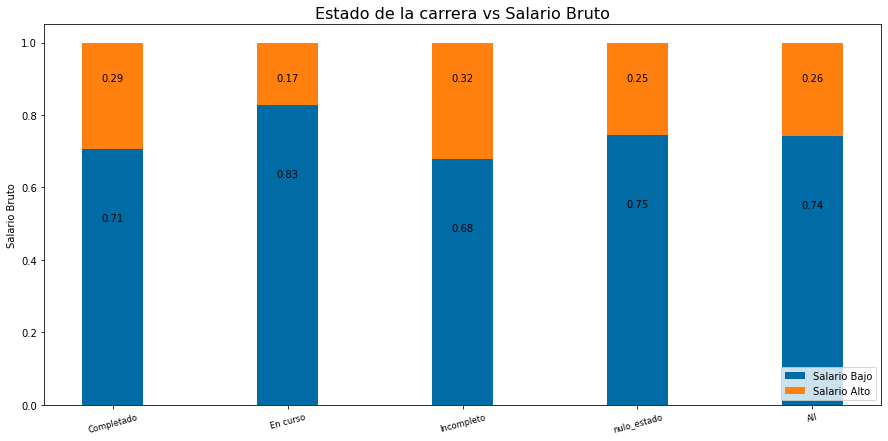

In [ ]:
fig, ax = plt.subplots(figsize= (15,7))
plt.style.use('tableau-colorblind10')

barraBajo= ax.bar(estado_vs_salario.index, estado_vs_salario['BAJO'], width= 0.35, label='Salario Bajo')
barraAlto= ax.bar(estado_vs_salario.index, estado_vs_salario['ALTO'], width= 0.35, bottom=estado_vs_salario['BAJO'], label='Salario Alto')

# Colocamos etiquetas en cada barra

for barra in barraAlto: 
  xa= barra.get_x()
  ya= barra.get_height()
  anchoa= barra.get_width()
  plt.text(xa+anchoa/2, y+0.15, round(ya,2), fontsize= 10, color= 'black', ha= 'center')
for barra in barraBajo: 
  x= barra.get_x()
  y= barra.get_height()
  ancho= barra.get_width()
  plt.text(x+ancho/2, y-0.2, round(y,2), fontsize= 10, color= 'black', ha= 'center')

ax.set_ylabel('Salario Bruto')
ax.set_title('Estado de la carrera vs Salario Bruto', fontsize= 16)
plt.xticks(size='small',rotation=15)
ax.legend(loc= 'lower right')

plt.show()

In [ ]:
# CURSO DE ESPECIALIZACION VS SALARIO BRUTO
curso_vs_salario= pd.crosstab(data10['realizaste_cursos_de_especializacion'],data10['salario_bruto'], normalize='index', margins=True)
curso_vs_salario

salario_bruto,ALTO,BAJO
realizaste_cursos_de_especializacion,,
No,0.303840,0.696160
"No, Sí, de forma particular",0.166667,0.833333
"No, Sí, los pagó un empleador",0.000000,1.000000
"Sí, de forma particular",0.210807,0.789193
"Sí, de forma particular, Sí, los pagó un empleador",0.308065,0.691935
"Sí, los pagó un empleador",0.330709,0.669291
nulo_curso_de_especializacion,0.254631,0.745369
All,0.257282,0.742718


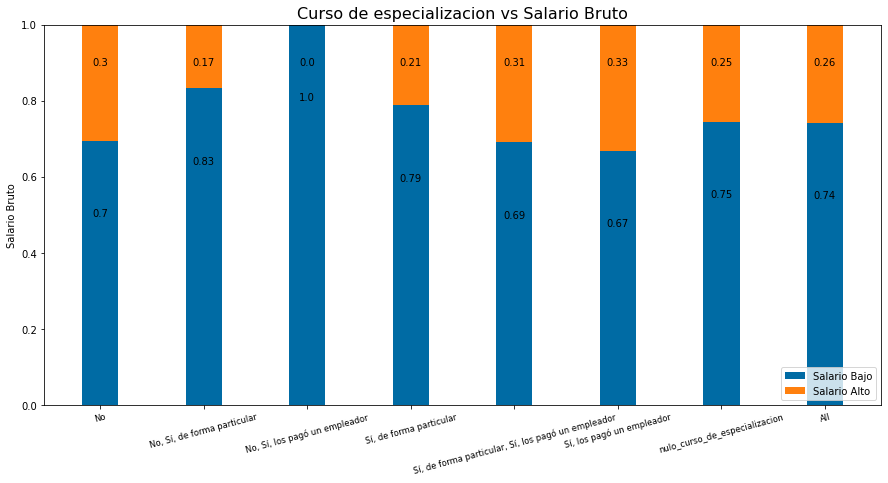

In [ ]:
fig, ax = plt.subplots(figsize= (15,7))
plt.style.use('tableau-colorblind10')

barraBajo= ax.bar(curso_vs_salario.index, curso_vs_salario['BAJO'], width= 0.35, label='Salario Bajo')
barraAlto= ax.bar(curso_vs_salario.index, curso_vs_salario['ALTO'], width= 0.35, bottom=curso_vs_salario['BAJO'], label='Salario Alto')

# Colocamos etiquetas en cada barra

for barra in barraAlto: 
  xa= barra.get_x()
  ya= barra.get_height()
  anchoa= barra.get_width()
  plt.text(xa+anchoa/2, y+0.15, round(ya,2), fontsize= 10, color= 'black', ha= 'center')
for barra in barraBajo: 
  x= barra.get_x()
  y= barra.get_height()
  ancho= barra.get_width()
  plt.text(x+ancho/2, y-0.2, round(y,2), fontsize= 10, color= 'black', ha= 'center')

ax.set_ylabel('Salario Bruto')
ax.set_title('Curso de especializacion vs Salario Bruto', fontsize= 16)
plt.xticks(size='small',rotation=15)
ax.legend(loc= 'lower right')

plt.show()

In [ ]:
# SENIORITY VS SALARIO BRUTO
seniority_vs_salario= pd.crosstab(data10['seniority'],data10['salario_bruto'], normalize='index', margins=True)
seniority_vs_salario

salario_bruto,ALTO,BAJO
seniority,,
Junior,0.060182,0.939818
Semi-Senior,0.214755,0.785245
Senior,0.373465,0.626535
nulo_seniority,0.000000,1.000000
All,0.257282,0.742718


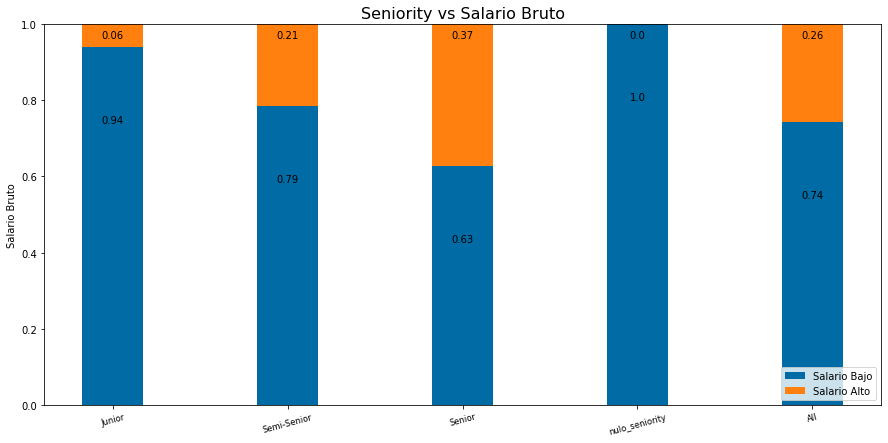

In [ ]:
fig, ax = plt.subplots(figsize= (15,7))
plt.style.use('tableau-colorblind10')

barraBajo= ax.bar(seniority_vs_salario.index, seniority_vs_salario['BAJO'], width= 0.35, label='Salario Bajo')
barraAlto= ax.bar(seniority_vs_salario.index, seniority_vs_salario['ALTO'], width= 0.35, bottom=seniority_vs_salario['BAJO'], label='Salario Alto')

# Colocamos etiquetas en cada barra

for barra in barraAlto: 
  xa= barra.get_x()
  ya= barra.get_height()
  anchoa= barra.get_width()
  plt.text(xa+anchoa/2, y+0.22, round(ya,2), fontsize= 10, color= 'black', ha= 'center')
for barra in barraBajo: 
  x= barra.get_x()
  y= barra.get_height()
  ancho= barra.get_width()
  plt.text(x+ancho/2, y-0.2, round(y,2), fontsize= 10, color= 'black', ha= 'center')

ax.set_ylabel('Salario Bruto')
ax.set_title('Seniority vs Salario Bruto', fontsize= 16)
plt.xticks(size='small',rotation=15)
ax.legend(loc= 'lower right')

plt.show()

In [ ]:
# GENTE A CARGO VS SALARIO BRUTO
genteCargo_vs_salario= pd.crosstab(data10['tiene_gente_a_cargo'],data10['salario_bruto'], normalize='index', margins=True)
genteCargo_vs_salario

salario_bruto,ALTO,BAJO
tiene_gente_a_cargo,,
No,0.209439,0.790561
Sí,0.395522,0.604478
All,0.257282,0.742718


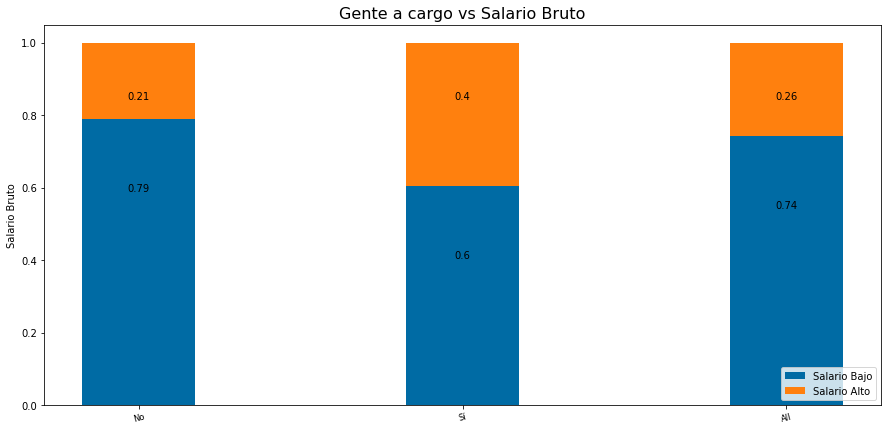

In [ ]:
fig, ax = plt.subplots(figsize= (15,7))
plt.style.use('tableau-colorblind10')

barraBajo= ax.bar(genteCargo_vs_salario.index, genteCargo_vs_salario['BAJO'], width= 0.35, label='Salario Bajo')
barraAlto= ax.bar(genteCargo_vs_salario.index, genteCargo_vs_salario['ALTO'], width= 0.35, bottom=genteCargo_vs_salario['BAJO'], label='Salario Alto')

# Colocamos etiquetas en cada barra

for barra in barraAlto: 
  xa= barra.get_x()
  ya= barra.get_height()
  anchoa= barra.get_width()
  plt.text(xa+anchoa/2, y+0.1, round(ya,2), fontsize= 10, color= 'black', ha= 'center')
for barra in barraBajo: 
  x= barra.get_x()
  y= barra.get_height()
  ancho= barra.get_width()
  plt.text(x+ancho/2, y-0.2, round(y,2), fontsize= 10, color= 'black', ha= 'center')

ax.set_ylabel('Salario Bruto')
ax.set_title('Gente a cargo vs Salario Bruto', fontsize= 16)
plt.xticks(size='small',rotation=15)
ax.legend(loc= 'lower right')

plt.show()

In [ ]:
# TIPO DE TRABAJO VS SALARIO BRUTO
trabajo_vs_salario= pd.crosstab(data10['trabajo_de_02'],data10['salario_bruto'], normalize='index', margins=True)
trabajo_vs_salario

salario_bruto,ALTO,BAJO
trabajo_de_02,,
Architect,0.496063,0.503937
BI Analyst / Data Analyst,0.115385,0.884615
Business Analyst,0.121212,0.878788
Consultant,0.135922,0.864078
Developer,0.214774,0.785226
HelpDesk,0.027778,0.972222
Manager / Director,0.652893,0.347107
Project Manager,0.429319,0.570681
QA / Tester,0.168627,0.831373


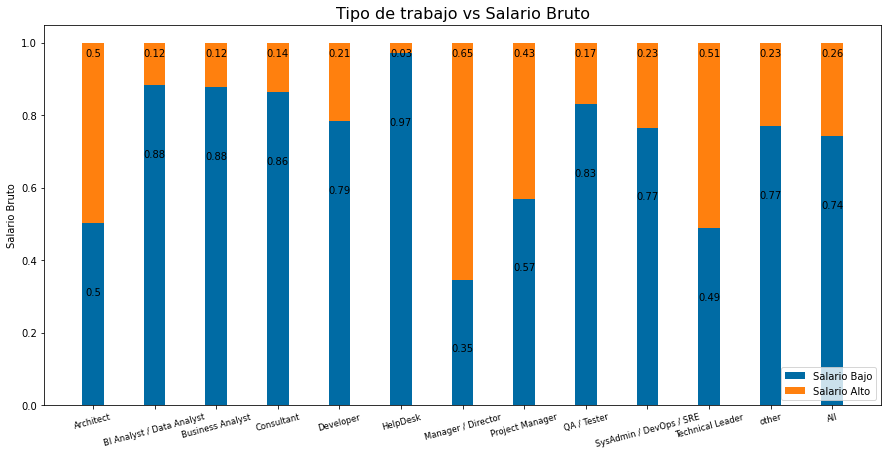

In [ ]:
fig, ax = plt.subplots(figsize= (15,7))
plt.style.use('tableau-colorblind10')

barraBajo= ax.bar(trabajo_vs_salario.index, trabajo_vs_salario['BAJO'], width= 0.35, label='Salario Bajo')
barraAlto= ax.bar(trabajo_vs_salario.index, trabajo_vs_salario['ALTO'], width= 0.35, bottom=trabajo_vs_salario['BAJO'], label='Salario Alto')

# Colocamos etiquetas en cada barra

for barra in barraAlto: 
  xa= barra.get_x()
  ya= barra.get_height()
  anchoa= barra.get_width()
  plt.text(xa+anchoa/2, y+0.22, round(ya,2), fontsize= 10, color= 'black', ha= 'center')
for barra in barraBajo: 
  x= barra.get_x()
  y= barra.get_height()
  ancho= barra.get_width()
  plt.text(x+ancho/2, y-0.2, round(y,2), fontsize= 10, color= 'black', ha= 'center')

ax.set_ylabel('Salario Bruto')
ax.set_title('Tipo de trabajo vs Salario Bruto', fontsize= 16)
plt.xticks(size='small',rotation=15)
ax.legend(loc= 'lower right')

plt.show()

In [ ]:
# CARRERA VS SALARIO BRUTO
carrera_vs_salario= pd.crosstab(data10['carrera_02'],data10['salario_bruto'], normalize='index', margins=True)
carrera_vs_salario

salario_bruto,ALTO,BAJO
carrera_02,,
Analista de Sistemas,0.231373,0.768627
Ingeniería en Informática,0.341772,0.658228
Ingeniería en Sistemas de Información,0.299817,0.700183
Licenciatura en Ciencias de la Computación,0.380368,0.619632
Licenciatura en Informática,0.259843,0.740157
Licenciatura en Sistemas de Información,0.301205,0.698795
Tecnicatura en Programación,0.129630,0.870370
nulo_carrera,0.252850,0.747150
other,0.218858,0.781142


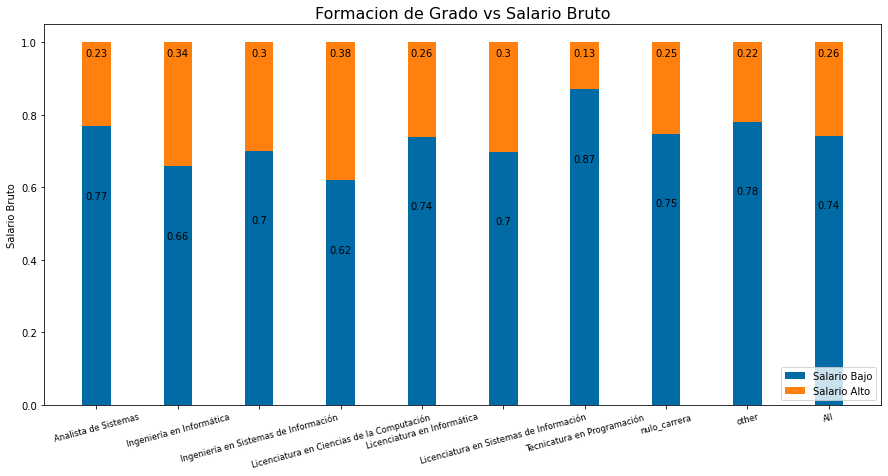

In [ ]:
fig, ax = plt.subplots(figsize= (15,7))
plt.style.use('tableau-colorblind10')

barraBajo= ax.bar(carrera_vs_salario.index, carrera_vs_salario['BAJO'], width= 0.35, label='Salario Bajo')
barraAlto= ax.bar(carrera_vs_salario.index, carrera_vs_salario['ALTO'], width= 0.35, bottom=carrera_vs_salario['BAJO'], label='Salario Alto')

# Colocamos etiquetas en cada barra

for barra in barraAlto: 
  xa= barra.get_x()
  ya= barra.get_height()
  anchoa= barra.get_width()
  plt.text(xa+anchoa/2, y+0.22, round(ya,2), fontsize= 10, color= 'black', ha= 'center')
for barra in barraBajo: 
  x= barra.get_x()
  y= barra.get_height()
  ancho= barra.get_width()
  plt.text(x+ancho/2, y-0.2, round(y,2), fontsize= 10, color= 'black', ha= 'center')

ax.set_ylabel('Salario Bruto')
ax.set_title('Formacion de Grado vs Salario Bruto', fontsize= 16)
plt.xticks(size='small',rotation=15)
ax.legend(loc= 'lower right')

plt.show()

In [ ]:
# Comenzamos Analisis bivariado de las variables categoricas de entrada vs var objetivo 
cat_vars(data10)

Index(['tipo_de_contrato', 'nivel_de_estudios_alcanzado', 'estado',
       'realizaste_cursos_de_especializacion', 'seniority',
       'tiene_gente_a_cargo', 'trabajo_de_02', 'carrera_02', 'universidad_02',
       'salario_bruto'],
      dtype='object')

In [ ]:
# UNIVERSIDAD VS SALARIO BRUTO
universidad_vs_salario= pd.crosstab(data10['universidad_02'],data10['salario_bruto'], normalize='index', margins=True)
universidad_vs_salario

salario_bruto,ALTO,BAJO
universidad_02,,
UADE - Universidad Argentina De la Empresa,0.270270,0.729730
UAI - Universidad Abierta Interamericana,0.256410,0.743590
UBA - Universidad de Buenos Aires,0.367299,0.632701
UNC - Universidad Nacional de Córdoba,0.293103,0.706897
UNLP - Universidad Nacional de La Plata,0.219780,0.780220
UNLaM - Universidad Nacional de La Matanza,0.309091,0.690909
UP - Universidad de Palermo,0.407407,0.592593
UTN - Universidad Tecnológica Nacional,0.259205,0.740795
nulo_universidad,0.247978,0.752022


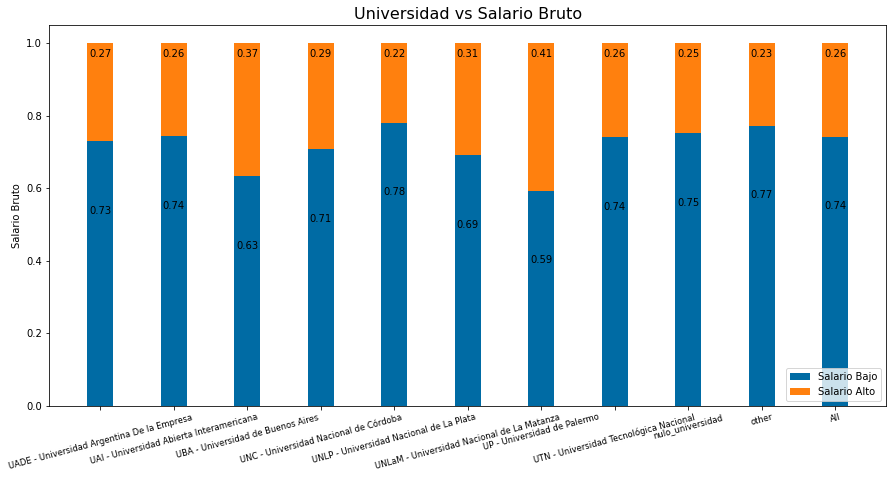

In [ ]:
fig, ax = plt.subplots(figsize= (15,7))
plt.style.use('tableau-colorblind10')

barraBajo= ax.bar(universidad_vs_salario.index, universidad_vs_salario['BAJO'], width= 0.35, label='Salario Bajo')
barraAlto= ax.bar(universidad_vs_salario.index, universidad_vs_salario['ALTO'], width= 0.35, bottom=universidad_vs_salario['BAJO'], label='Salario Alto')

# Colocamos etiquetas en cada barra

for barra in barraAlto: 
  xa= barra.get_x()
  ya= barra.get_height()
  anchoa= barra.get_width()
  plt.text(xa+anchoa/2, y+0.22, round(ya,2), fontsize= 10, color= 'black', ha= 'center')
for barra in barraBajo: 
  x= barra.get_x()
  y= barra.get_height()
  ancho= barra.get_width()
  plt.text(x+ancho/2, y-0.2, round(y,2), fontsize= 10, color= 'black', ha= 'center')

ax.set_ylabel('Salario Bruto')
ax.set_title('Universidad vs Salario Bruto', fontsize= 16)
plt.xticks(size='small',rotation=15)
ax.legend(loc= 'lower right')

plt.show()

Conclusiones
- **Tipo de contrato** vs salario bruto -> vemos que la probabilidad de acceder a un sueldo bruto alto es diferente para la categoría 'Remoto (empresa de otro pais)'. Luego considerando las categorias 'Freelance', 'Full-Time' y 'Tercerizado' vemos que la probalibilidad de acceder a un sueldo bruto alto se mantiene practicamente igual. Finalmente en las categorias 'Part-Time' y 'Participacion societaria en una cooperativa' la mencionada probabilidad cae acruptamente. Mirando el panorama completo podriamos aceptar, a priori, que la variable de entrada analizada es un **buen predictor**. 
- **Nivel de estudio alcanzado** vs salario bruto -> algo similar sucede al caso anterior. Se evidencian tres grupos de categorias donde la probabilidad de acceder a un sueldo bruto alto cambia significativamnte con el nivel formativo alcanzado. Por lo tanto consideraremos también a esta variable como un **buen predictor**.
- Curso de especialización vs salario bruto -> En este caso la probabilidad de de acceder a un sueldo bruto alto no cambia siginificativamente para cada categoría. Sin embargo podemos observar que en la categoria 'No. Si, los pagó un empleador' la mencionada probaliblidad de anula. Por otro lado al no comprenderse acabadamente el significado de esta categoria la exluimos del analisis. Sintesis: esta variable se considera una mala predictora.
- **Seniority** vs salario bruto -> observamos claramente un aumento sostenido de la probabilidad de acceder a un sueldo bruto alto a medida que el seniority se eleva. Consideramos, a priori, esta variable como un **buen predictor**.
- **Gente a cargo** vs salario bruto -> hay un cambio signficativo (100%) en la probabilidad de acceder a un sueldo bruto alto entre aquellos que no tienen gente a cargo y los que si. Consideramos, a priori, esta variable como un **buen predictor**.
- Tipo de trabajo vs salario bruto -> sin ser muy rigurosos observamos que existen cambios siginifcativos en la probabilidad de acceder a un sueldo bruto alto al cambiar el tipo de trabajo. Consideramos, a priori, esta variable como un buen predictor. 
- Carrera vs salario bruto -> No observamos cambios siginicativos en la probabilidad de acceder a un sueldo bruto alto por lo tanto consideramos esta variable como un mal predictor.
- Universidad vs salario bruto -> No observamos cambios siginicativos en la probabilidad de acceder a un sueldo bruto alto por lo tanto consideramos esta variable como un mal predictor.


In [ ]:
num_vars(data10)

In [ ]:
data10.groupby('salario_bruto').mean().T.round(2)

In [ ]:
plt.figure(figsize=(10,7))

index_sort= data10.groupby('salario_bruto')['anos_de_experiencia'].median().sort_values(ascending=False).index
sns.boxplot(y='anos_de_experiencia', x='salario_bruto',data=data10, order= index_sort);
plt.ylabel('Años de experiencia')
plt.xlabel('Salario Bruto')

In [ ]:
plt.figure(figsize=(10,7))

index_sort= data10.groupby('salario_bruto')['anos_en_la_empresa_actual'].median().sort_values(ascending=False).index
sns.boxplot(y='anos_en_la_empresa_actual', x='salario_bruto',data=data10, order= index_sort);
plt.ylabel('Años en la empresa')
plt.xlabel('Salario Bruto')

In [ ]:
plt.figure(figsize=(10,7))

index_sort= data10.groupby('salario_bruto')['anos_en_el_puesto_actual'].median().sort_values(ascending=False).index
sns.boxplot(y='anos_en_el_puesto_actual', x='salario_bruto',data=data10, order= index_sort);
plt.ylabel('Años en el puesto actual')
plt.xlabel('Salario Bruto')

In [ ]:
#fig, ax= plt.subplots(figsize=(10,7),nrows= 1, ncols= 3)
plt.style.use('tableau-colorblind10')

filtro1= data10[data10['salario_bruto']=='ALTO']
expALTO= filtro1['anos_de_experiencia']
filtro2= data10[data10['salario_bruto']=='BAJO']
expBAJO= filtro2['anos_de_experiencia']


empresaALTO= filtro1['anos_en_la_empresa_actual']
empresaBAJO= filtro2['anos_en_la_empresa_actual']
puestoALTO= filtro1['anos_en_el_puesto_actual']
puestoBAJO= filtro2['anos_en_el_puesto_actual']


fig, ax= plt.subplots(figsize=(20,10), nrows= 1, ncols= 3)
data_series= [expALTO, expBAJO]
data_series1= [empresaALTO, empresaALTO]
data_series2= [puestoALTO,puestoBAJO]
bbox_props = dict(color="g", alpha=0.9, linestyle="dashdot")

ax[0].boxplot(data_series, vert= True, showmeans= True, boxprops= bbox_props); 
ax[0].set_title('Años de experiencia vs salario bruto', fontsize= 10)

ax[1].boxplot(data_series1, vert= True, showmeans= True, patch_artist= True); # utilizamos el argumento 'patch_artist' para colorear la caja.
ax[1].set_title('Años en la empresa actual vs salario bruto', fontsize= 10)

ax[2].boxplot(data_series2, vert= True, showmeans= True, patch_artist= True);
ax[2].set_title('Años en el puesto actual vs salario bruto', fontsize= 10)


CONCLUSION
Podemos observar en la última visualización que los boxplot de la variable 'anos_de_experencia vs  salario_bruto' no estan alineados horizontalmente, es decir que separan mejor la clase (salario bruto ALTO y BAJO) que las otras variables (años en la empresa y en el puesto). Por lo tanto consideraremos que los años de experiencia es una mejor variable predictora que las otras dos mencionadas.  

In [ ]:
 # Finalmente podríamos analizar la relacion entre las variables numericas vs salario bruto sin discretizar mediante scatter plot e histogramas de densidad. 
plt.figure(figsize=(20,10))
sns.scatterplot(x='anos_de_experiencia',y='salario_mensual_o_retiro_bruto_en_tu_moneda_local',data=data09);
plt.ylabel('Salario Bruto')
plt.xlabel('Años de experiencia')


In [ ]:
import scipy.stats
import numpy as np


In [ ]:
#from IPython.core.pylabtools import figsize
plt.style.use('tableau-colorblind10')

# Cálculo para la leyenda
skew= round(expALTO.skew(),2)
media= round(expALTO.mean(),2)
mediana= round(expALTO.median(),2)
sigma= round(expALTO.std(),2)
kurtosis= round(expALTO.kurt(),2)

skew1= round(expBAJO.skew(),2)
media1= round(expBAJO.mean(),2)
mediana1= round(expBAJO.median(),2)
sigma1= round(expBAJO.std(),2)
kurtosis1= round(expBAJO.kurt(),2)

# Armado de la leyenda
label= "Skew: "+ str(skew)
label+= "\nMedia: "+ str(media)
label+= "\nMediana: "+ str(mediana)
label+= "\nSigma: "+ str(sigma)
label+= "\nKurtosis: "+ str(kurtosis)

label1= "Skew: "+ str(skew1)
label1+= "\nMedia: "+ str(media1)
label1+= "\nMediana: "+ str(mediana1)
label1+= "\nSigma: "+ str(sigma1)
label1+= "\nKurtosis: "+ str(kurtosis1)


# Inicializamos el gráfico
fig, ax= plt.subplots(figsize=(15,7), nrows= 1, ncols= 2)


counts, bins, bars = ax[0].hist(expALTO, bins= 100, color= 'silver', edgecolor= 'k', label= label)
ax[0].set_title('Histograma Años de experiencia para sueldo bruto ALTO', fontsize= 10)
ax[0].plot([media,media],[0,round(max(counts),2)], 'k--', lw=3)

counts1, bins1, bars1 = ax[1].hist(expBAJO, bins= 100, color= 'red', edgecolor= 'k', label= label1)
ax[1].set_title('Histograma Años de experiencia para sueldo bruto BAJO', fontsize= 10)
ax[1].plot([media1,media1],[0,round(max(counts1),2)], 'k--', lw=3)
ax[0].legend(fontsize= 12);
ax[1].legend(fontsize= 12);

In [ ]:
# Construimos una funcion de densidad probabilidad normal con la media y desviación estandar de correspondiente al set de datos. 
# La idea 
fig, ax= plt.subplots(figsize=(10,7))

dist= scipy.stats.norm(loc= media, scale= sigma)
dist1= scipy.stats.norm(loc= media1, scale= sigma1)
 
x= np.linspace(0,22,100)
x= np.round(x,2)

plt.plot(x, dist.pdf(x), label='PDF expALTO', c= 'k',ls= '-', lw='1');
plt.plot(x, dist1.pdf(x), label='PDF expBAJO', c= 'b',ls= '-', lw='1')
plt.plot([media,media],[0,0.07], 'k--', lw=3, c='k')
plt.plot([media1,media1],[0,0.07], 'k--', lw=3, c='b')

plt.legend(fontsize=12)
plt.title('Funciones densidad de experiencia para salario bruto ALTO y BAJO', fontsize= 14);

